In [4]:
import pandas as kfp
import scipy.interpolate
import datautilities
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

In [5]:
unprocessedSig = kfp.read_csv("Signal Data/rateTable.csv", header=None)
dipoletoAmplitude = { }

for index in range(len(unprocessedSig)):
    dipoletoAmplitude[ unprocessedSig[1][index] ] = unprocessedSig[2][index]
numofmasses = 11
fulldict = {}

for index in range(1, int(len(unprocessedSig[0])/numofmasses) + 1 ):
    # print(index*numofmasses)
    fulldict[ unprocessedSig[0][index*numofmasses - 1] ] = dipoletoAmplitude

# print(fulldict[0.05][5.016891464581947e-12])

# print(datautilities.signalintegral(1, 6, 18))

# [X, Y] = np.meshgrid(unprocessedSig[0][0:4], unprocessedSig[1][0:4])
[X, Y] = np.meshgrid(unprocessedSig[0], unprocessedSig[1])
# print("X, Y")
# print(X)
# print("X End")
# print(Y)

#pol.griddata([unprocessedSig[0], unprocessedSig[1]], unprocessedSig[2], (X, Y), method='nearest')

massarray = np.array(unprocessedSig[0])
dipolearray = np.array(unprocessedSig[1])
amplitudearray = np.array(unprocessedSig[2])

# def f(x, y):
#    return x + y
# print("F(x)")
# print(array)
# print(f(array, array))

# print(np.random.choice(unprocessedSig[0][0:4], len(unprocessedSig[0][0:4])))
dailyrate = []
# print(datautilities.signalintegral(1, 6, 32))
for data in range( len(unprocessedSig[2]) ):
    temprate = datautilities.signalintegral(unprocessedSig[2][data], 6, 32)[0]
    # print(temprate)
    dailyrate.append(temprate)

dailyratearray = np.array(dailyrate)
# print(dailyratearray)


<ipython-input-8-439e0d4c269b>:2: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(X, Y, Ti, [1, 100], locator=ticker.LogLocator(), cmap=cm.PuBu_r)


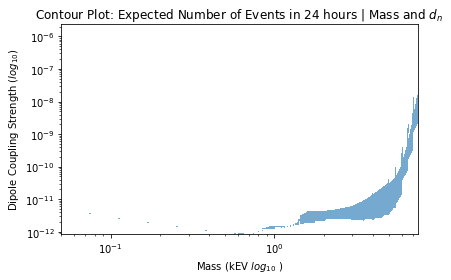

In [8]:
Ti = scipy.interpolate.griddata( (massarray, dipolearray), dailyratearray, (X, Y), method='linear')
plt.contourf(X, Y, Ti, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
plt.yscale('log')
plt.xscale('log')
plt.title("Contour Plot: Expected Number of Events in 24 hours | Mass and $d_{n}$ ")
plt.ylabel('Dipole Coupling Strength ($log_{10}$)')
plt.xlabel('Mass (kEV $log_{10}$ )')
plt.tight_layout()
plt.show()